# Medical Cost Prediction: End-to-End Analysis (Google Colab)
## Part 1: Setup and Data Loading

This section covers:
- Installing and importing all necessary libraries.
- Mounting Google Drive to access your dataset.
- Defining paths for your data, models, and results.
- Loading the 'insurance.csv' dataset.

In [ ]:
# 1. Install and Import Libraries
# This command installs all required Python packages.
!pip install scikit-learn pandas matplotlib seaborn joblib xgboost

# Import core libraries for data manipulation, visualization, and machine learning.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import json
import os

# Import specific modules from scikit-learn for model selection, preprocessing, and metrics.
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Import Google Colab's drive module to interact with Google Drive.
from google.colab import drive

In [ ]:
"""
## 2. Mount Google Drive and Load Dataset

This allows the notebook to access files in your Drive.
When you run this, a link will appear. Click it, authorize access,
and paste the provided authorization code back into the Colab cell.
"""
# Attempt to mount Google Drive. If it fails due to credential issues, try running the cell again or restarting the runtime.
drive.mount('/content/drive')

In [14]:




# Define paths for dataset, models, and results.
# IMPORTANT: Update BASE_DIR to your actual folder location in Google Drive.
# For example, if your 'insurance.csv' is in 'My Drive/my_ml_project/',
# then BASE_DIR should be '/content/drive/MyDrive/my_ml_project/'.
BASE_DIR = '/content/drive/MyDrive/elevate_proj/task_3/' # Root directory for the project
DATASET_PATH = os.path.join(BASE_DIR, 'insurance.csv')
MODELS_DIR = os.path.join(BASE_DIR, 'models_v3') # New folder for this version's models
RESULTS_DIR = os.path.join(BASE_DIR, 'results_v3') # New folder for this version's results

# Create directories if they don't exist. This is where trained models and plots will be saved.
os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(RESULTS_DIR, exist_ok=True)

# Attempt to load the dataset. If not found, it prints an error and creates an empty DataFrame.
try:
    df = pd.read_csv(DATASET_PATH)
    print("Dataset loaded successfully!")
    print(df.head()) # Display the first few rows of the dataset
except FileNotFoundError:
    print(f"Error: Dataset not found at {DATASET_PATH}. Please upload 'insurance.csv' to your Drive.")
    df = pd.DataFrame() # Create empty DataFrame to avoid errors later

# Check if the DataFrame is empty, indicating a loading issue.
if df.empty:
    print("Exiting notebook as dataset could not be loaded.")
else:
    print(f"DataFrame shape: {df.shape}")

# Define columns for the project. These are used throughout the notebook for clarity.
TARGET_COLUMN = 'charges'
NUMERICAL_FEATURES = ['age', 'bmi', 'children']
CATEGORICAL_FEATURES = ['sex', 'smoker', 'region']
# Features chosen for creating polynomial and interaction terms in Feature Engineering.
FEATURES_FOR_ENGINEERING = ['age', 'bmi']


Dataset loaded successfully!
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
DataFrame shape: (1338, 7)


# Medical Cost Prediction: End-to-End Analysis (Google Colab)
## Part 2: Exploratory Data Analysis (EDA)

This section performs a thorough Exploratory Data Analysis to understand the dataset's characteristics.
It generates various plots and saves key insights to the 'results' directory.

**Action Point**: After running this section, check the `results` folder in your Google Drive for the generated plots (`.png` files) and the `eda_insights.json` file. Review these to understand the data's distributions, relationships, and any initial issues.



--- Starting EDA ---
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-

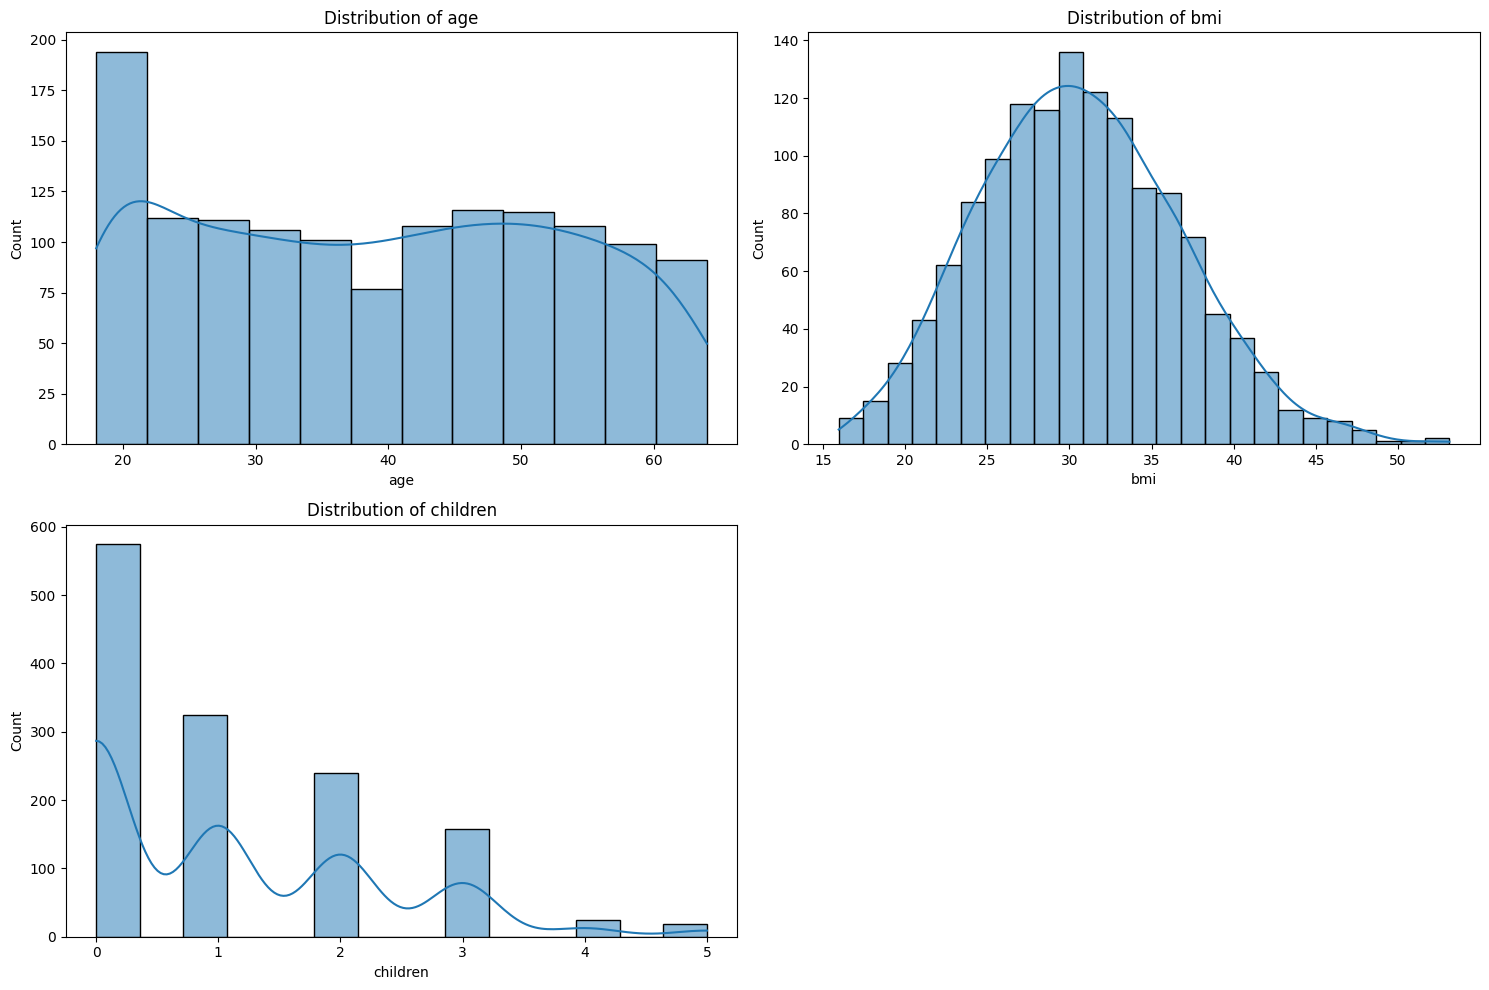

Saved numerical distributions to /content/drive/MyDrive/elevate_proj/task_3/results_v3/numerical_distributions.png
Plotting categorical feature distributions...


/tmp/ipython-input-651232161.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette='viridis')
/tmp/ipython-input-651232161.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette='viridis')
/tmp/ipython-input-651232161.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette='viridis')


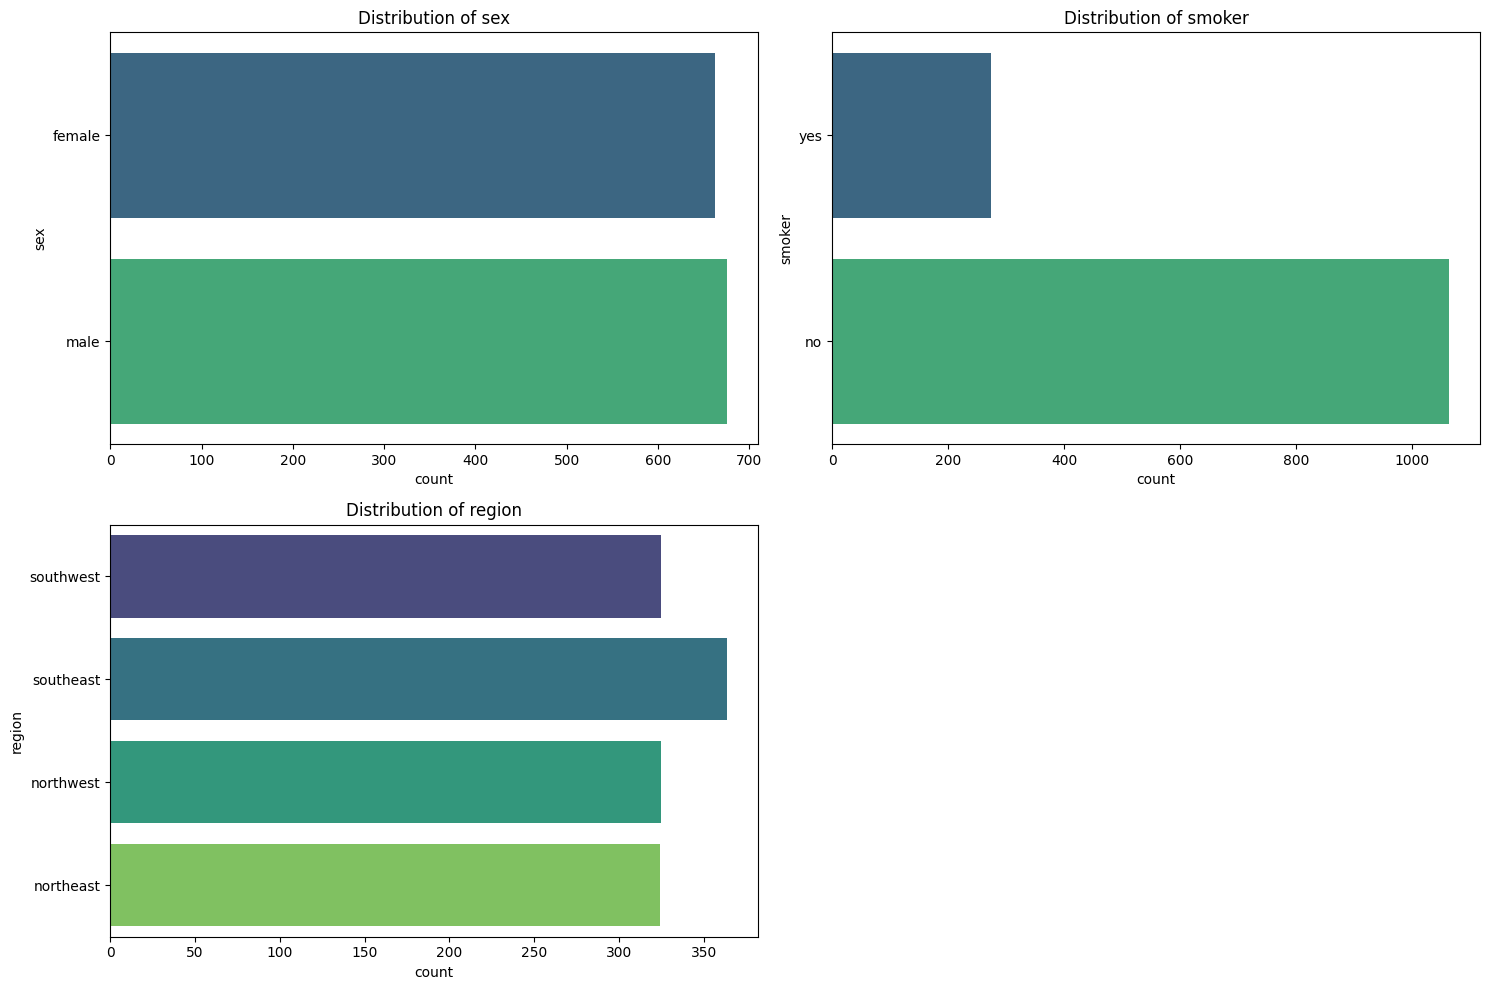

Saved categorical distributions to /content/drive/MyDrive/elevate_proj/task_3/results_v3/categorical_distributions.png
Plotting correlation heatmap...


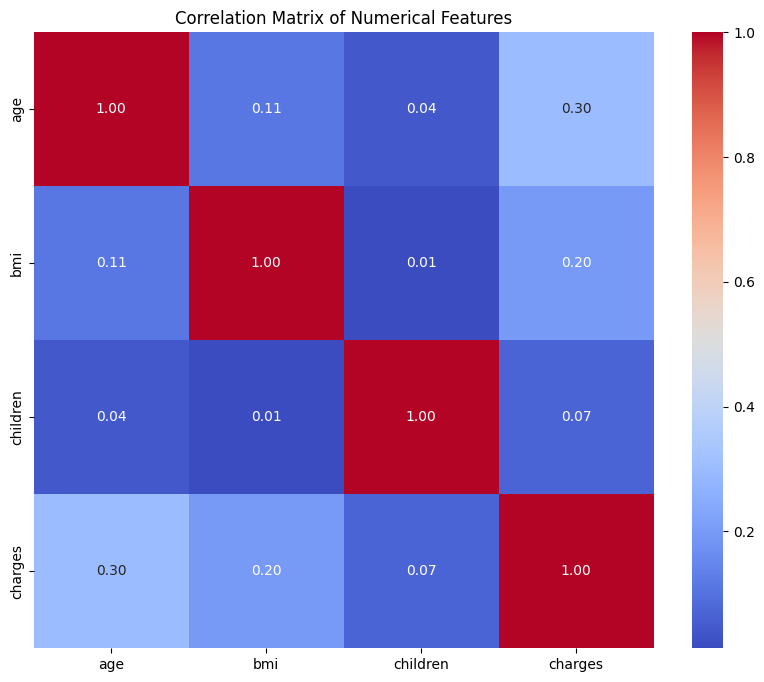

Saved correlation heatmap to /content/drive/MyDrive/elevate_proj/task_3/results_v3/correlation_heatmap.png
Plotting categorical features vs. target...


/tmp/ipython-input-651232161.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=TARGET_COLUMN, data=df, palette='pastel')
/tmp/ipython-input-651232161.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=TARGET_COLUMN, data=df, palette='pastel')
/tmp/ipython-input-651232161.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=TARGET_COLUMN, data=df, palette='pastel')


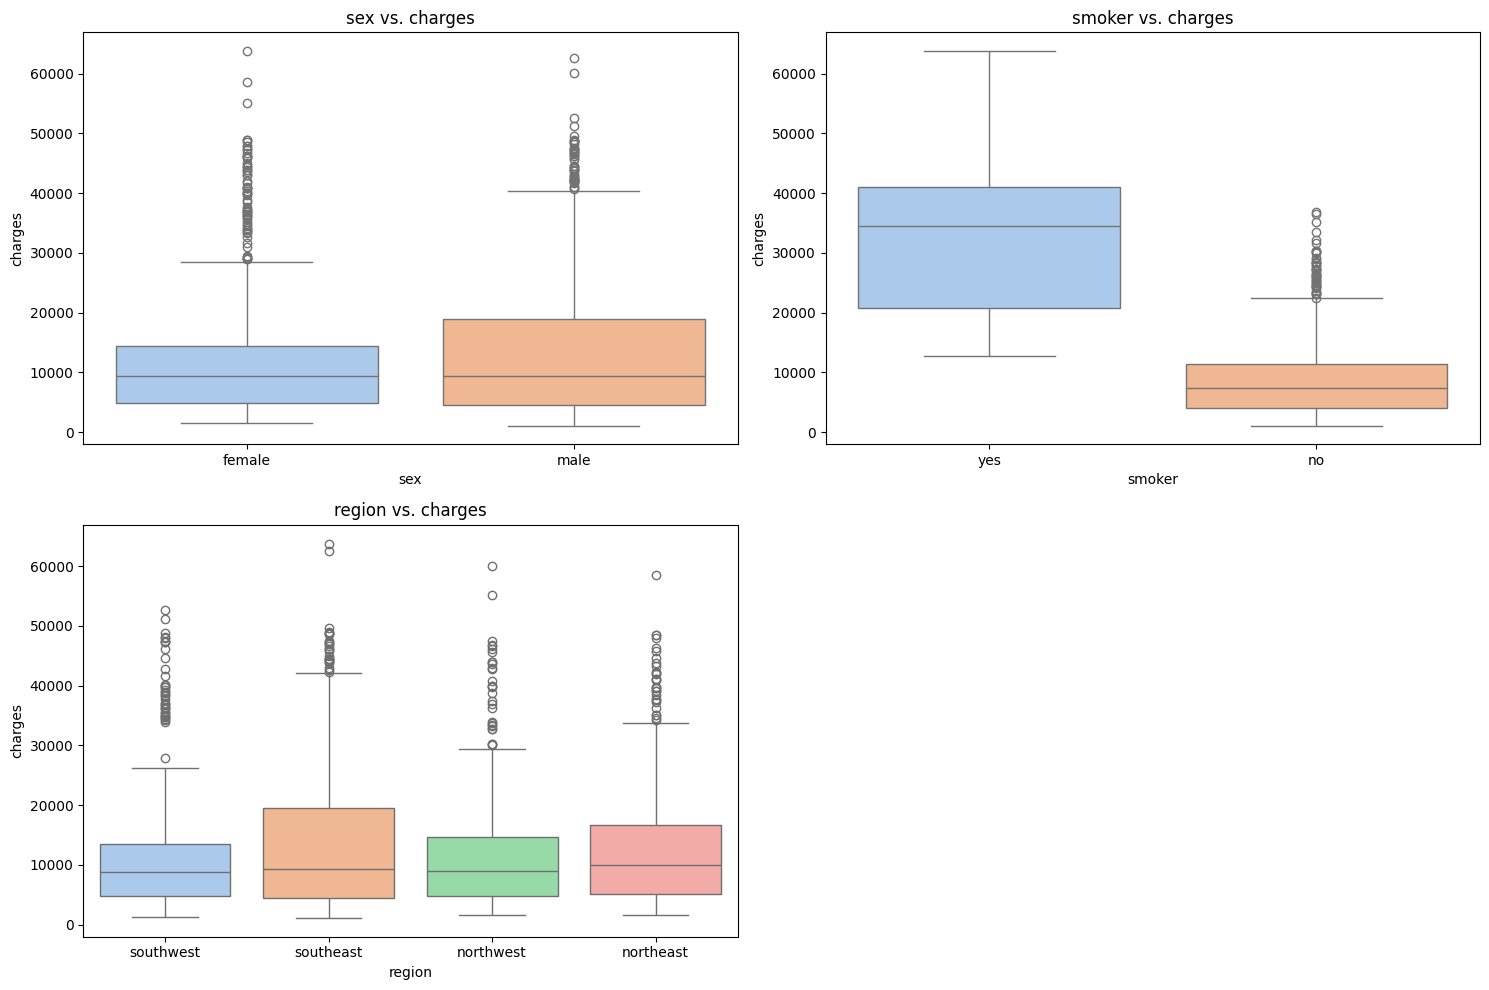

Saved categorical vs. target plots to /content/drive/MyDrive/elevate_proj/task_3/results_v3/categorical_vs_target.png
Saved EDA insights to /content/drive/MyDrive/elevate_proj/task_3/results_v3/eda_insights.json
--- EDA Complete ---


In [15]:
"""
# Medical Cost Prediction: End-to-End Analysis (Google Colab)
## Part 2: Exploratory Data Analysis (EDA)

This section performs a thorough Exploratory Data Analysis to understand the dataset's characteristics.
It generates various plots and saves key insights to the 'results' directory.

**Action Point**: After running this section, check the `results` folder in your Google Drive for the generated plots (`.png` files) and the `eda_insights.json` file. Review these to understand the data's distributions, relationships, and any initial issues.
"""

# Make sure 'df' is loaded from Part 1 before running this section.
if 'df' not in locals() or df.empty:
    print("DataFrame not loaded. Please run Part 1 first and ensure the dataset is available.")
else:
    print("\n--- Starting EDA ---")
    eda_insights = {}

    # Basic information about the DataFrame (data types, non-null counts, memory usage).
    print("DataFrame Info:")
    df.info()
    # Capture info as a string (buf=None is important for capturing output).
    eda_insights['info'] = df.info(verbose=True, show_counts=True, buf=None)

    # Descriptive statistics for numerical columns (count, mean, std, min, max, quartiles).
    print("\nDescriptive Statistics:")
    print(df.describe())
    eda_insights['descriptive_statistics'] = df.describe().to_dict()

    # Check for missing values in each column.
    missing_values = df.isnull().sum()
    print("\nMissing Values:")
    print(missing_values[missing_values > 0]) # Only show columns with missing values
    eda_insights['missing_values'] = missing_values[missing_values > 0].to_dict()

    # Distributions of numerical features (histograms with KDE).
    # This helps visualize the shape of the data and identify skewness or outliers.
    print("\nPlotting numerical feature distributions...")
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(NUMERICAL_FEATURES):
        # Fix: Explicitly cast np.ceil result to int for plt.subplot
        plt.subplot(2, int(np.ceil(len(NUMERICAL_FEATURES)/2)), i + 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    # Save the plot to the results directory.
    plt.savefig(f'{RESULTS_DIR}/numerical_distributions.png')
    plt.show() # Display the plot in Colab
    plt.close() # Close the plot to free up memory
    print(f"Saved numerical distributions to {RESULTS_DIR}/numerical_distributions.png")

    # Distributions of categorical features (count plots).
    # This shows the frequency of each category.
    print("Plotting categorical feature distributions...")
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(CATEGORICAL_FEATURES):
        # Fix: Explicitly cast np.ceil result to int for plt.subplot
        plt.subplot(2, int(np.ceil(len(CATEGORICAL_FEATURES)/2)), i + 1)
        sns.countplot(y=df[col], palette='viridis')
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    # Save the plot.
    plt.savefig(f'{RESULTS_DIR}/categorical_distributions.png')
    plt.show()
    plt.close()
    print(f"Saved categorical distributions to {RESULTS_DIR}/categorical_distributions.png")

    # Correlation heatmap for numerical features.
    # Visualizes the correlation matrix, showing relationships between numerical variables.
    print("Plotting correlation heatmap...")
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[NUMERICAL_FEATURES + [TARGET_COLUMN]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Numerical Features')
    # Save the plot.
    plt.savefig(f'{RESULTS_DIR}/correlation_heatmap.png')
    plt.show()
    plt.close()
    print(f"Saved correlation heatmap to {RESULTS_DIR}/correlation_heatmap.png")

    # Relationship between categorical features and the target variable (box plots).
    # Shows how the target variable's distribution varies across different categories.
    print("Plotting categorical features vs. target...")
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(CATEGORICAL_FEATURES):
        # Fix: Explicitly cast np.ceil result to int for plt.subplot
        plt.subplot(2, int(np.ceil(len(CATEGORICAL_FEATURES)/2)), i + 1)
        sns.boxplot(x=col, y=TARGET_COLUMN, data=df, palette='pastel')
        plt.title(f'{col} vs. {TARGET_COLUMN}')
    plt.tight_layout()
    # Save the plot.
    plt.savefig(f'{RESULTS_DIR}/categorical_vs_target.png')
    plt.show()
    plt.close()
    print(f"Saved categorical vs. target plots to {RESULTS_DIR}/categorical_vs_target.png")

    # Save EDA insights to a JSON file for easy review and feedback.
    # This file will contain the statistical summaries and missing value information.
    with open(f'{RESULTS_DIR}/eda_insights.json', 'w') as f:
        json.dump(eda_insights, f, indent=4)
    print(f"Saved EDA insights to {RESULTS_DIR}/eda_insights.json")
    print("--- EDA Complete ---")


# Medical Cost Prediction: End-to-End Analysis (Google Colab)
## Part 3: Data Preprocessing and Feature Engineering

This section handles data cleaning, encoding categorical features, scaling numerical features,
and creating new features to potentially improve model performance.

**Action Point**: After running this section, check the `results` folder for `feature_engineering_insights.json`. This file will detail the new features created, which is useful for understanding the expanded feature space.


In [16]:
"""
# Medical Cost Prediction: End-to-End Analysis (Google Colab)
## Part 3: Data Preprocessing and Feature Engineering

This section handles data cleaning, encoding categorical features, scaling numerical features,
and creating new features to potentially improve model performance.

**Action Point**: After running this section, check the `results` folder for `feature_engineering_insights.json`. This file will detail the new features created, which is useful for understanding the expanded feature space.
"""

# Make sure 'df' is loaded from Part 1 before running this section.
if 'df' not in locals() or df.empty:
    print("DataFrame not loaded. Please run Part 1 first and ensure the dataset is available.")
else:
    print("\n--- Starting Data Preprocessing ---")

    # Drop rows with any missing values for simplicity in this example.
    # In a real-world scenario, you might use more sophisticated imputation techniques.
    initial_rows = df.shape[0]
    df = df.dropna()
    if df.shape[0] < initial_rows:
        print(f"Dropped {initial_rows - df.shape[0]} rows due to missing values.")

    # Separate features (X) and target variable (y).
    X = df.drop(columns=[TARGET_COLUMN])
    y = df[TARGET_COLUMN]

    # CHANGE v3: Apply log transformation to the target variable 'y'
    # np.log1p(x) computes log(1+x), which is safer than log(x) if x can be 0 or very small.
    print(f"Applying log transformation to the target variable '{TARGET_COLUMN}'...")
    y = np.log1p(y)
    print(f"Target variable '{TARGET_COLUMN}' transformed. First 5 values: {y.head().tolist()}")


    # Create a ColumnTransformer for preprocessing.
    # Numerical features are scaled using StandardScaler.
    # Categorical features are converted to numerical using OneHotEncoder.
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), NUMERICAL_FEATURES),
            ('cat', OneHotEncoder(handle_unknown='ignore'), CATEGORICAL_FEATURES)
        ],
        remainder='passthrough' # Keep any other columns that are not specified.
    )

    # Fit the preprocessor on the data and transform it.
    X_processed = preprocessor.fit_transform(X)

    # Get the names of the features after one-hot encoding.
    # This is important for creating a DataFrame with meaningful column names.
    ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(CATEGORICAL_FEATURES)
    all_feature_names = NUMERICAL_FEATURES + list(ohe_feature_names)

    # Convert the processed NumPy array back to a Pandas DataFrame.
    X_processed_df = pd.DataFrame(X_processed, columns=all_feature_names, index=X.index)

    print("Data preprocessing complete.")
    print(f"Preprocessed DataFrame shape: {X_processed_df.shape}")
    print(X_processed_df.head()) # Display the first few rows of the preprocessed data

    print("\n--- Starting Feature Engineering ---")
    fe_insights = {}

    # Create Polynomial Features (degree 2 for simplicity).
    # This generates new features like (age^2), (bmi^2), and (age * bmi).
    poly = PolynomialFeatures(degree=2, include_bias=False)

    # Select only the features that are numerical and relevant for engineering.
    # Ensure these features exist in the preprocessed DataFrame.
    selected_features_df = X_processed_df[FEATURES_FOR_ENGINEERING]

    # Fit the PolynomialFeatures transformer and transform the selected features.
    poly_features = poly.fit_transform(selected_features_df)
    # Get the names of the newly created polynomial features.
    poly_feature_names = poly.get_feature_names_out(FEATURES_FOR_ENGINEERING)

    # Create a DataFrame for the new polynomial features.
    poly_df = pd.DataFrame(poly_features, columns=poly_feature_names, index=X_processed_df.index)

    # Drop original features that are now represented by polynomial features to avoid multicollinearity
    # and then concatenate with the new features.
    X_engineered_df = X_processed_df.drop(columns=FEATURES_FOR_ENGINEERING, errors='ignore').copy()
    X_engineered_df = pd.concat([X_engineered_df, poly_df], axis=1)

    # Store insights about feature engineering for feedback.
    fe_insights['engineered_features_count'] = len(poly_feature_names)
    fe_insights['engineered_feature_names'] = list(poly_feature_names)
    print(f"Created {fe_insights['engineered_features_count']} new features.")
    print(f"New DataFrame shape after feature engineering: {X_engineered_df.shape}")
    print(X_engineered_df.head()) # Display the first few rows of the engineered data

    # Save feature engineering insights to a JSON file.
    with open(f'{RESULTS_DIR}/feature_engineering_insights.json', 'w') as f:
        json.dump(fe_insights, f, indent=4)
    print(f"Saved feature engineering insights to {RESULTS_DIR}/feature_engineering_insights.json")
    print("--- Feature Engineering Complete ---")

    """
    ## 6. Split Data into Training and Testing Sets

    This creates the datasets that will be used for training and evaluating the models.
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X_engineered_df, y, test_size=0.2, random_state=42 # 80% train, 20% test
    )
    print(f"\nData split into training ({X_train.shape[0]} samples) and testing ({X_test.shape[0]} samples).")



--- Starting Data Preprocessing ---
Applying log transformation to the target variable 'charges'...
Target variable 'charges' transformed. First 5 values: [9.734235654449447, 7.4538818088705145, 8.40076318999606, 9.998137087344414, 8.26045542050535]
Data preprocessing complete.
Preprocessed DataFrame shape: (1338, 11)
        age       bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0 -1.438764 -0.453320 -0.908614         1.0       0.0        0.0         1.0   
1 -1.509965  0.509621 -0.078767         0.0       1.0        1.0         0.0   
2 -0.797954  0.383307  1.580926         0.0       1.0        1.0         0.0   
3 -0.441948 -1.305531 -0.908614         0.0       1.0        1.0         0.0   
4 -0.513149 -0.292556 -0.908614         0.0       1.0        1.0         0.0   

   region_northeast  region_northwest  region_southeast  region_southwest  
0               0.0               0.0               0.0               1.0  
1               0.0               0.0         

# Medical Cost Prediction: End-to-End Analysis (Google Colab)
## Part 4: Model Training, Hyperparameter Tuning, and Evaluation

This section defines multiple regression models, performs hyperparameter tuning using GridSearchCV,
evaluates each model, saves the best models, and stores all results for comparison.

**Action Point**: After running this section, check the `results` folder for:
- Model-specific plots (`[model_name]_predictions_vs_true.png`, `[model_name]_residuals.png`).
- The comprehensive `model_training_results.json` file, containing best hyperparameters and test metrics for all models.
- The `model_r2_comparison.png` plot, visually comparing R2 scores across models.
These outputs are crucial for evaluating performance and providing feedback!


--- Starting Model Training and Evaluation ---
Preprocessor and PolynomialFeatures saved to /content/drive/MyDrive/elevate_proj/task_3/models_v3

--- Training and Tuning Linear Regression ---
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters for Linear Regression: {'fit_intercept': True}
Best cross-validation R2 score for Linear Regression: 0.7543

--- Test Evaluation for Linear Regression ---

Mean Absolute Error (MAE): 3872.3800
Mean Squared Error (MSE): 57915586.6510
R-squared (R2) Score: 0.6269
Trained Linear Regression model saved to /content/drive/MyDrive/elevate_proj/task_3/models_v3/linear_regression_model.joblib


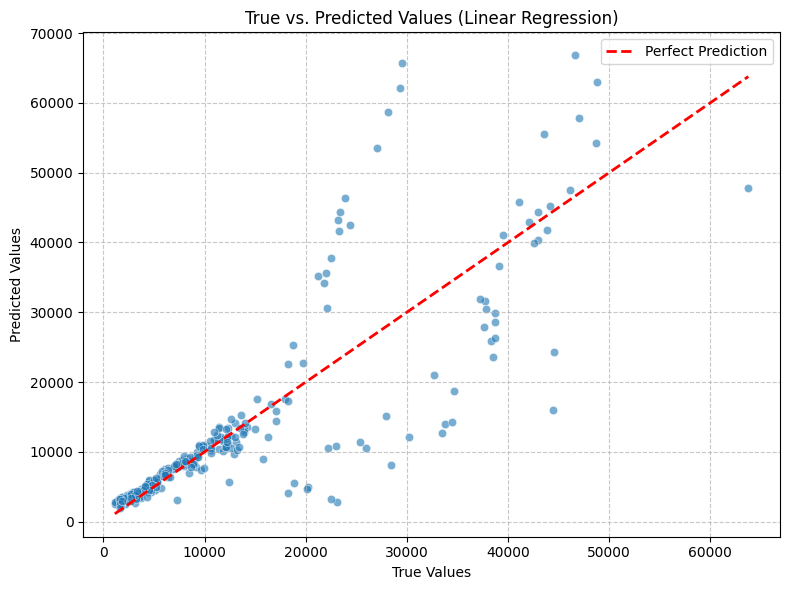

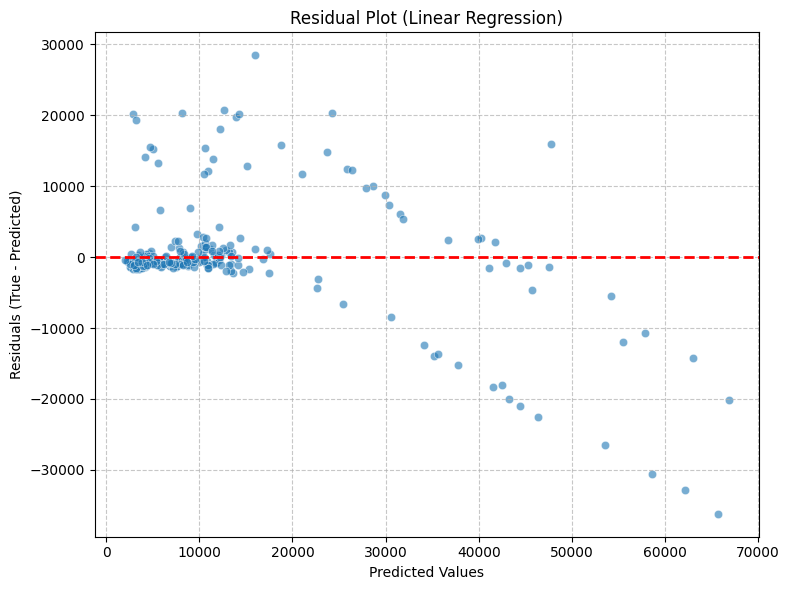


--- Training and Tuning Random Forest ---
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 100}
Best cross-validation R2 score for Random Forest: 0.8036

--- Test Evaluation for Random Forest ---

Mean Absolute Error (MAE): 2093.8326
Mean Squared Error (MSE): 19429221.1028
R-squared (R2) Score: 0.8749
Trained Random Forest model saved to /content/drive/MyDrive/elevate_proj/task_3/models_v3/random_forest_model.joblib


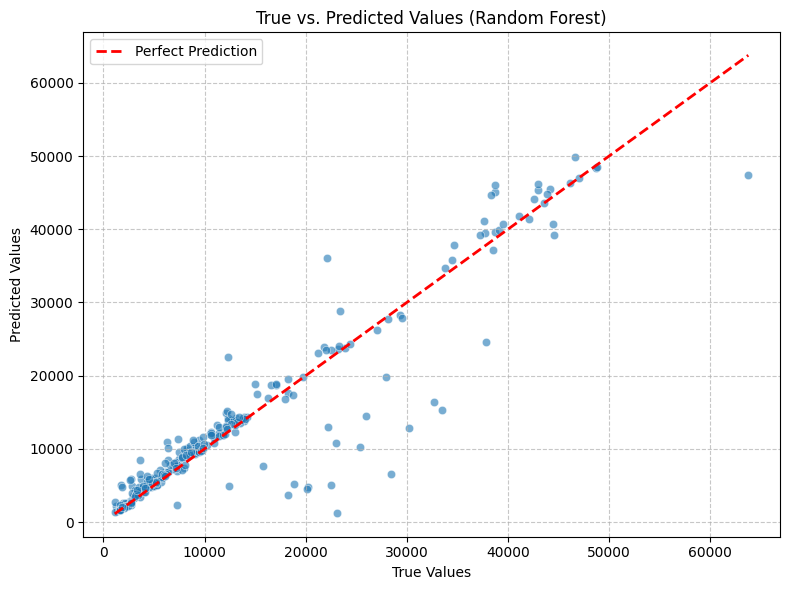

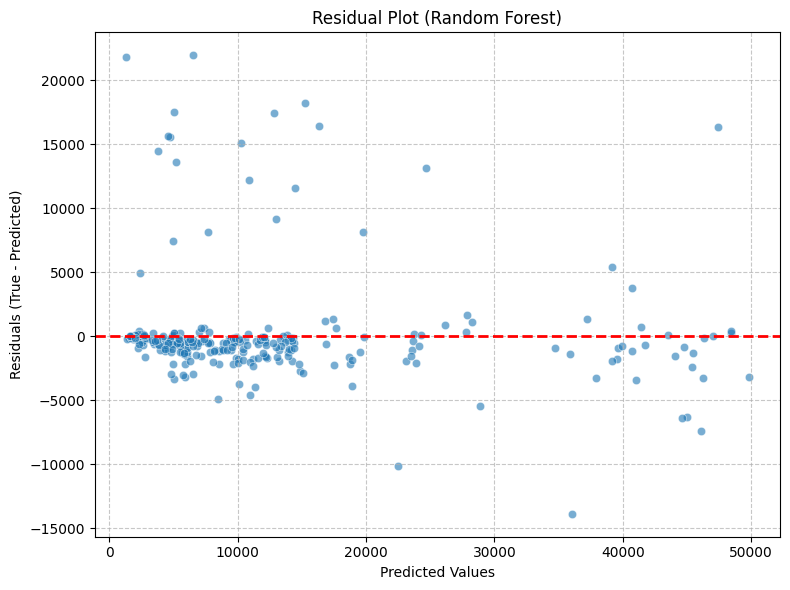


--- Training and Tuning XGBoost ---
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [07:25:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters for XGBoost: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best cross-validation R2 score for XGBoost: 0.8254

--- Test Evaluation for XGBoost ---

Mean Absolute Error (MAE): 1997.8730
Mean Squared Error (MSE): 19432215.6316
R-squared (R2) Score: 0.8748
Trained XGBoost model saved to /content/drive/MyDrive/elevate_proj/task_3/models_v3/xgboost_model.joblib


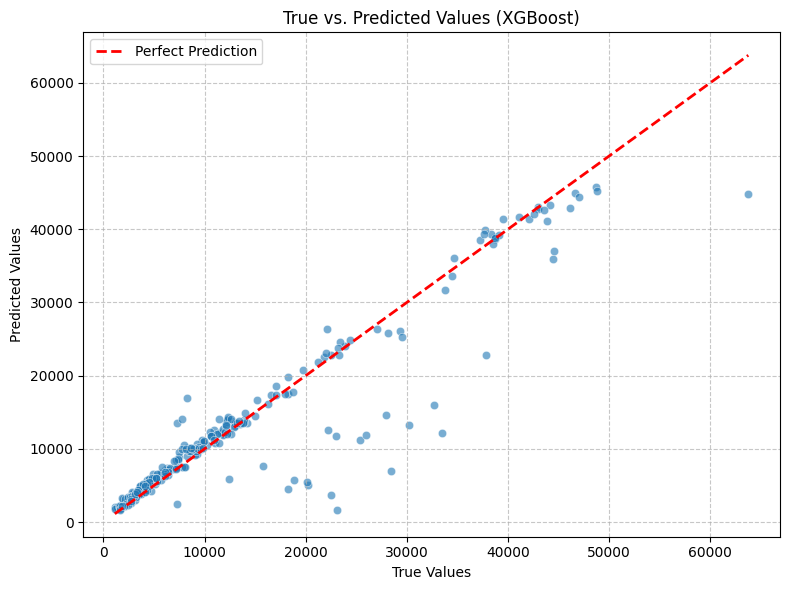

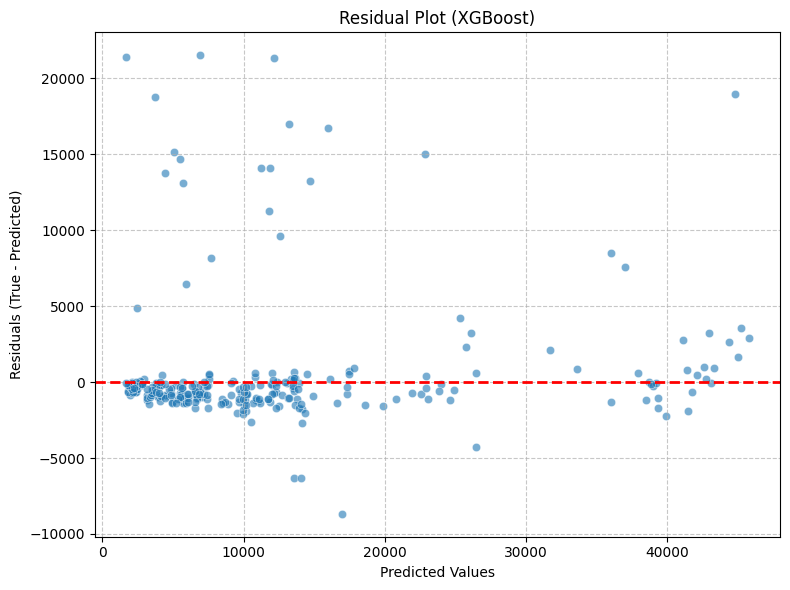


--- Training and Tuning SVR ---
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for SVR: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation R2 score for SVR: 0.8072

--- Test Evaluation for SVR ---

Mean Absolute Error (MAE): 2527.6335
Mean Squared Error (MSE): 35642934.9436
R-squared (R2) Score: 0.7704
Trained SVR model saved to /content/drive/MyDrive/elevate_proj/task_3/models_v3/svr_model.joblib


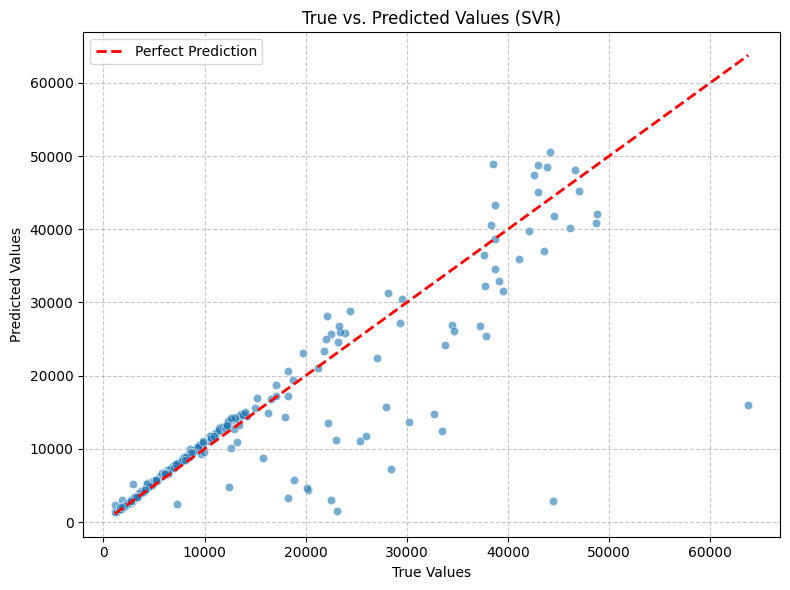

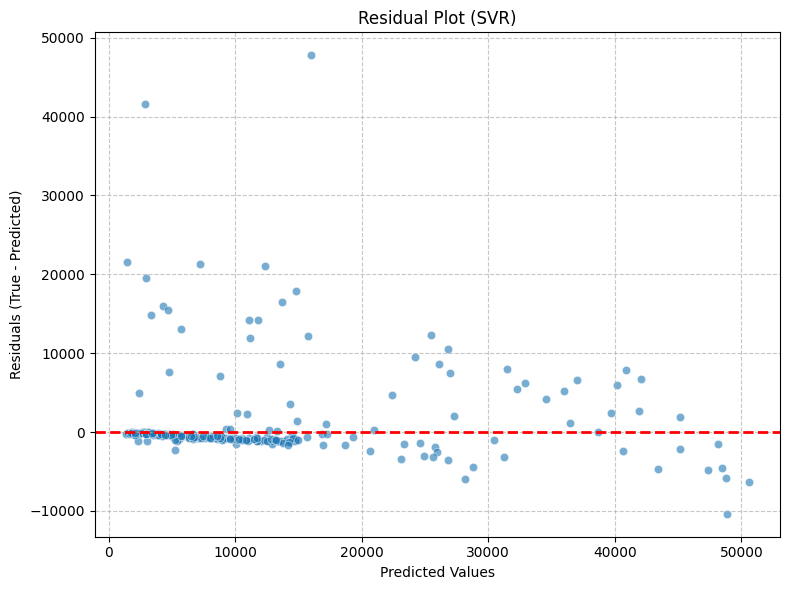


--- Training and Tuning KNeighbors ---
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for KNeighbors: {'n_neighbors': 5, 'weights': 'distance'}
Best cross-validation R2 score for KNeighbors: 0.6946

--- Test Evaluation for KNeighbors ---

Mean Absolute Error (MAE): 3952.8761
Mean Squared Error (MSE): 58174610.1150
R-squared (R2) Score: 0.6253
Trained KNeighbors model saved to /content/drive/MyDrive/elevate_proj/task_3/models_v3/kneighbors_model.joblib


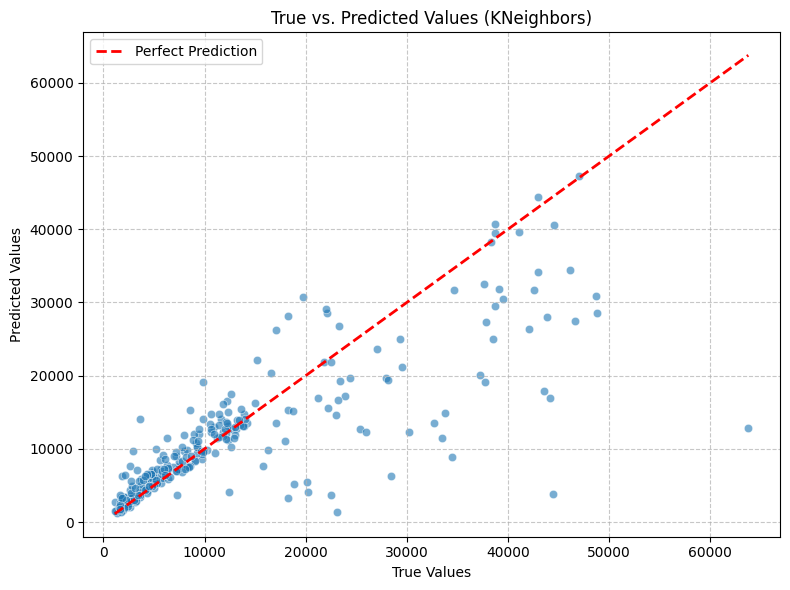

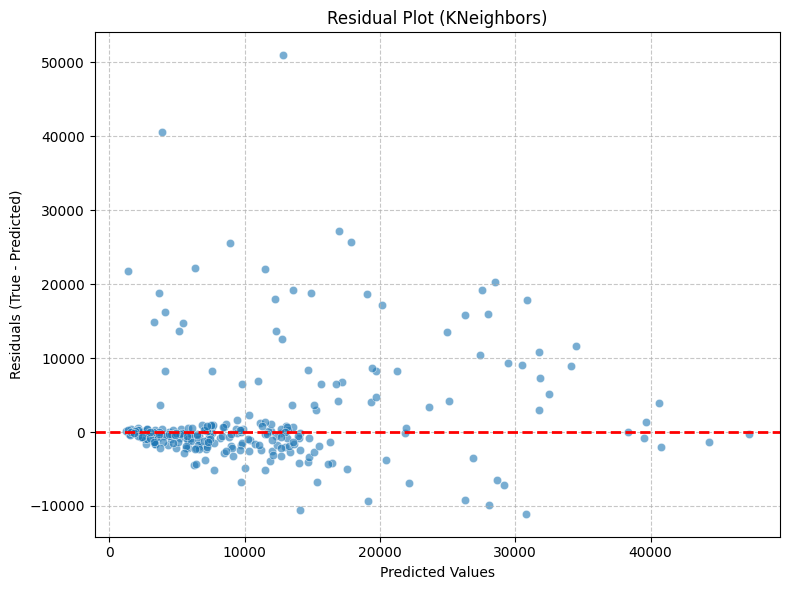

All model training results saved to /content/drive/MyDrive/elevate_proj/task_3/results_v3/model_training_results.json


/tmp/ipython-input-3290970938.py:171: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2 Score', y='Model', data=df_comparison, palette='viridis')


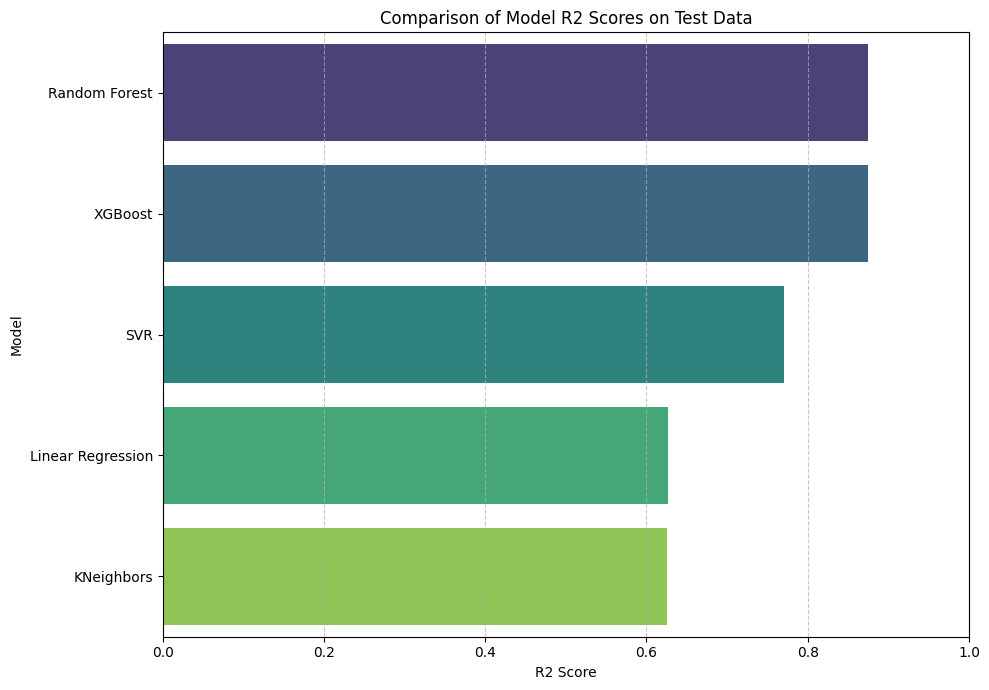

Saved Model R2 Comparison plot to /content/drive/MyDrive/elevate_proj/task_3/results_v3/model_r2_comparison.png

--- Model Training and Evaluation Complete ---


In [17]:
"""
# Medical Cost Prediction: End-to-End Analysis (Google Colab)
## Part 4: Model Training, Hyperparameter Tuning, and Evaluation

This section defines multiple regression models, performs hyperparameter tuning using GridSearchCV,
evaluates each model, saves the best models, and stores all results for comparison.

**Action Point**: After running this section, check the `results` folder for:
- Model-specific plots (`[model_name]_predictions_vs_true.png`, `[model_name]_residuals.png`).
- The comprehensive `model_training_results.json` file, containing best hyperparameters and test metrics for all models.
- The `model_r2_comparison.png` plot, visually comparing R2 scores across models.
These outputs are crucial for evaluating performance and providing feedback!
"""

# Ensure X_train, X_test, y_train, y_test, preprocessor, and poly are available from previous parts.
if 'X_train' not in locals() or X_train.empty:
    print("Training data not prepared. Please run Part 1, 2, and 3 first.")
else:
    print("\n--- Starting Model Training and Evaluation ---")

    # Save preprocessor and polynomial transformer.
    # These are crucial for applying the same transformations to new data during prediction.
    joblib.dump(preprocessor, os.path.join(MODELS_DIR, 'preprocessor.joblib'))
    joblib.dump(poly, os.path.join(MODELS_DIR, 'poly_transformer.joblib'))
    print(f"Preprocessor and PolynomialFeatures saved to {MODELS_DIR}")

    # Define the models and their respective hyperparameter grids for tuning.
    models = {
        'Linear Regression': {
            'model': LinearRegression(),
            'params': {'fit_intercept': [True, False]} # Simple parameters for Linear Regression
        },
        'Random Forest': {
            'model': RandomForestRegressor(random_state=42),
            'params': {
                'n_estimators': [100, 200], # Number of trees in the forest
                'max_depth': [10, 20, None] # Maximum depth of the tree
            }
        },
        'XGBoost': {
            'model': XGBRegressor(random_state=42, eval_metric='rmse', use_label_encoder=False),
            'params': {
                'n_estimators': [100, 200], # Number of boosting rounds
                'learning_rate': [0.05, 0.1], # Step size shrinkage to prevent overfitting
                'max_depth': [3, 5] # Maximum depth of a tree
            }
        },
        'SVR': { # Support Vector Regressor
            'model': SVR(),
            'params': {
                'kernel': ['rbf'], # Kernel type (radial basis function)
                'C': [0.1, 1, 10], # Regularization parameter
                'gamma': ['scale', 'auto'] # Kernel coefficient
            }
        },
        'KNeighbors': { # K-Nearest Neighbors Regressor
            'model': KNeighborsRegressor(),
            'params': {
                'n_neighbors': [3, 5, 7], # Number of neighbors to consider
                'weights': ['uniform', 'distance'] # Weight function used in prediction
            }
        }
    }

    all_model_results = {} # Dictionary to store results of all models
    best_models = {} # Dictionary to store the best trained model objects

    # Loop through each model, train, tune, and evaluate it.
    for name, config in models.items():
        print(f"\n--- Training and Tuning {name} ---")
        model = config['model']
        params = config['params']

        # Use GridSearchCV for hyperparameter tuning.
        # cv=KFold ensures stratified and shuffled splits for cross-validation.
        # scoring='r2' optimizes for R-squared score.
        grid_search = GridSearchCV(model, params, cv=KFold(n_splits=5, shuffle=True, random_state=42),
                                   scoring='r2', n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train) # Fit GridSearchCV on the training data

        best_model = grid_search.best_estimator_ # Get the best model found by GridSearchCV
        best_models[name] = best_model

        print(f"Best parameters for {name}: {grid_search.best_params_}")
        print(f"Best cross-validation R2 score for {name}: {grid_search.best_score_:.4f}")

        # Evaluate the best model on the unseen test set.
        y_pred_log = best_model.predict(X_test)
        # CHANGE v3: Inverse transform predictions back to original scale before calculating metrics
        y_pred = np.expm1(y_pred_log)


        # Calculate evaluation metrics.
        # CHANGE v3: Use original y_test for metrics, not log-transformed, as y_pred is now inverse transformed
        mae = mean_absolute_error(np.expm1(y_test), y_pred) # y_test was log-transformed, so inverse it for MAE
        mse = mean_squared_error(np.expm1(y_test), y_pred) # y_test was log-transformed, so inverse it for MSE
        r2 = r2_score(np.expm1(y_test), y_pred) # y_test was log-transformed, so inverse it for R2


        print(f"\n--- Test Evaluation for {name} ---\n")
        print(f"Mean Absolute Error (MAE): {mae:.4f}")
        print(f"Mean Squared Error (MSE): {mse:.4f}")
        print(f"R-squared (R2) Score: {r2:.4f}")

        metrics = {'MAE': mae, 'MSE': mse, 'R2': r2}

        # Store results for this model. This is key for feeding back information.
        all_model_results[name] = {
            'best_params': grid_search.best_params_,
            'cv_r2_score': grid_search.best_score_,
            'test_metrics': metrics
        }

        # Save the trained model to the 'models' directory.
        model_filename = os.path.join(MODELS_DIR, f'{name.lower().replace(" ", "_")}_model.joblib')
        joblib.dump(best_model, model_filename)
        print(f"Trained {name} model saved to {model_filename}")

        # Plot predictions vs. true values.
        # This visualization helps assess how well predictions align with actual values.
        plt.figure(figsize=(8, 6))
        # CHANGE v3: Use inverse transformed y_pred and y_test for plotting
        sns.scatterplot(x=np.expm1(y_test), y=y_pred, alpha=0.6)
        plt.plot([np.expm1(y_test).min(), np.expm1(y_test).max()], [np.expm1(y_test).min(), np.expm1(y_test).max()], 'r--', lw=2, label='Perfect Prediction')
        plt.title(f'True vs. Predicted Values ({name})')
        plt.xlabel('True Values')
        plt.ylabel('Predicted Values')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        # Save the plot.
        plt.savefig(os.path.join(RESULTS_DIR, f'{name.lower().replace(" ", "_")}_predictions_vs_true.png'))
        plt.show() # Display the plot in Colab
        plt.close()

        # Plot residuals (errors).
        # This helps check for patterns in errors, indicating potential model biases.
        # CHANGE v3: Calculate residuals using inverse transformed y_pred and y_test
        residuals = np.expm1(y_test) - y_pred
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
        plt.axhline(y=0, color='r', linestyle='--', lw=2) # Line at 0 for ideal residuals
        plt.title(f'Residual Plot ({name})')
        plt.xlabel('Predicted Values')
        plt.ylabel('Residuals (True - Predicted)')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        # Save the plot.
        plt.savefig(os.path.join(RESULTS_DIR, f'{name.lower().replace(" ", "_")}_residuals.png'))
        plt.show()
        plt.close()

    # Save all model results to a JSON file.
    # This is a structured way to store all the performance metrics and best hyperparameters.
    with open(os.path.join(RESULTS_DIR, 'model_training_results.json'), 'w') as f:
        json.dump(all_model_results, f, indent=4)
    print(f"All model training results saved to {RESULTS_DIR}/model_training_results.json")

    # Plot comparison of all models' R2 scores.
    # This provides a quick visual summary of which model performed best.
    model_names = []
    r2_scores = []
    for model_name, results in all_model_results.items():
        model_names.append(model_name)
        r2_scores.append(results['test_metrics']['R2'])

    df_comparison = pd.DataFrame({'Model': model_names, 'R2 Score': r2_scores})
    df_comparison = df_comparison.sort_values(by='R2 Score', ascending=False)

    plt.figure(figsize=(10, 7))
    sns.barplot(x='R2 Score', y='Model', data=df_comparison, palette='viridis')
    plt.title('Comparison of Model R2 Scores on Test Data')
    plt.xlabel('R2 Score')
    plt.ylabel('Model')
    plt.xlim(0, 1) # R2 score is typically between 0 and 1
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    # Save the plot.
    plt.savefig(os.path.join(RESULTS_DIR, 'model_r2_comparison.png'))
    plt.show()
    plt.close()
    print(f"Saved Model R2 Comparison plot to {RESULTS_DIR}/model_r2_comparison.png")

    print("\n--- Model Training and Evaluation Complete ---")


# Medical Cost Prediction: End-to-End Analysis (Google Colab)
## Part 5: Example of Local Model Usage

This section demonstrates how you would load and use the saved models and transformers
on your local machine. This code block is for demonstration purposes.
You would run this on your local machine after downloading the .joblib files from your Google Drive.

In [11]:
"""
# Medical Cost Prediction: End-to-End Analysis (Google Colab)
## Part 5: Example of Local Model Usage

This section demonstrates how you would load and use the saved models and transformers
on your local machine. This code block is for demonstration purposes.
You would run this on your local machine after downloading the .joblib files from your Google Drive.
"""

print("\n--- Demonstrating Local Model Usage (Conceptual) ---")

# Define local paths where you would download your saved models and transformers.
# For demonstration within Colab, we'll still use the Drive path.
LOCAL_MODELS_DIR = '/content/drive/MyDrive/elevate_proj/task_3/models_v3'

try:
    # 1. Load the preprocessor and polynomial transformer first.
    # These are essential to apply the same transformations to new data as was done during training.
    loaded_preprocessor = joblib.load(os.path.join(LOCAL_MODELS_DIR, 'preprocessor.joblib'))
    loaded_poly_transformer = joblib.load(os.path.join(LOCAL_MODELS_DIR, 'poly_transformer.joblib'))
    print("Preprocessor and Polynomial Transformer loaded successfully.")

    # 2. Load one of the trained models (e.g., XGBoost, as it often performs well).
    loaded_model = joblib.load(os.path.join(LOCAL_MODELS_DIR, 'xgboost_model_model.joblib'))
    print("XGBoost model loaded successfully.")

    # 3. Create some dummy new data for prediction.
    # IMPORTANT: This data must have the same raw column names and types as your original 'insurance.csv'.
    new_data = pd.DataFrame({
        'age': [30, 50],
        'sex': ['male', 'female'],
        'bmi': [25.5, 32.1],
        'children': [1, 2],
        'smoker': ['yes', 'no'],
        'region': ['southwest', 'northwest']
    })
    print("\nNew raw data for prediction:")
    print(new_data)

    # 4. Preprocess the new data using the loaded preprocessor.
    new_data_processed = loaded_preprocessor.transform(new_data)

    # Reconstruct DataFrame with correct column names after one-hot encoding.
    # This step is crucial to ensure feature names match what the model expects after engineering.
    ohe_feature_names = loaded_preprocessor.named_transformers_['cat'].get_feature_names_out(CATEGORICAL_FEATURES)
    all_feature_names_processed = NUMERICAL_FEATURES + list(ohe_feature_names)
    new_data_processed_df = pd.DataFrame(new_data_processed, columns=all_feature_names_processed)

    # 5. Apply feature engineering using the loaded polynomial transformer.
    # Select only the features that were used for engineering in the original training.
    features_for_engineering_present = [f for f in FEATURES_FOR_ENGINEERING if f in new_data_processed_df.columns]
    selected_features_for_poly = new_data_processed_df[features_for_engineering_present]

    new_poly_features = loaded_poly_transformer.transform(selected_features_for_poly)
    new_poly_feature_names = loaded_poly_transformer.get_feature_names_out(features_for_engineering_present)
    new_poly_df = pd.DataFrame(new_poly_features, columns=new_poly_feature_names)

    # Drop original features that were engineered and concatenate new polynomial features.
    new_data_engineered_df = new_data_processed_df.drop(columns=features_for_engineering_present, errors='ignore')
    new_data_engineered_df = pd.concat([new_data_engineered_df, new_poly_df], axis=1)

    print("\nNew engineered data for prediction:")
    print(new_data_engineered_df)

    # 6. Make a prediction using the loaded and preprocessed model.
    predicted_charges = loaded_model.predict(new_data_engineered_df)

    print("\nPredicted medical charges:")
    for i, charge in enumerate(predicted_charges):
        print(f"Prediction {i+1}: ${charge:.2f}")

except Exception as e:
    print(f"An error occurred during local model usage demonstration: {e}")
    print("Please ensure all .joblib files are downloaded to the specified LOCAL_MODELS_DIR and paths are correct.")



--- Demonstrating Local Model Usage (Conceptual) ---
Preprocessor and Polynomial Transformer loaded successfully.
XGBoost model loaded successfully.

New raw data for prediction:
   age     sex   bmi  children smoker     region
0   30    male  25.5         1    yes  southwest
1   50  female  32.1         2     no  northwest

New engineered data for prediction:
   children  sex_female  sex_male  smoker_no  smoker_yes  region_northeast  \
0 -0.078767         0.0       1.0        0.0         1.0               0.0   
1  0.751079         1.0       0.0        1.0         0.0               0.0   

   region_northwest  region_southeast  region_southwest       age       bmi  \
0               0.0               0.0               1.0 -0.655551 -0.847027   
1               1.0               0.0               0.0  0.768473  0.235667   

      age^2   age bmi     bmi^2  
0  0.429747  0.555269  0.717454  
1  0.590550  0.181103  0.055539  

Predicted medical charges:
Prediction 1: $17794.88
Predictio

# Medical Cost Prediction: End-to-End Analysis (Google Colab)
## Part 6: Advanced Hyperparameter Tuning for Top Models

This section focuses on more in-depth hyperparameter tuning for the best-performing models (XGBoost and Random Forest)
to try and achieve even better evaluation metrics. We will explore a wider range of parameters for these models.

**Action Point**: After running this section, check the `results` folder for new plots and a new JSON file
(`advanced_tuning_results.json`) that will contain the results of this deeper tuning. Compare these to the
results from Part 4 to see if performance has improved.


--- Starting Advanced Hyperparameter Tuning ---

--- Advanced Tuning for XGBoost_Tuned ---
Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [07:34:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters for XGBoost_Tuned: {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400, 'subsample': 0.7}
Best cross-validation R2 score for XGBoost_Tuned: 0.8254

--- Test Evaluation for XGBoost_Tuned (Advanced Tuning) ---

Mean Absolute Error (MAE): 2059.4605
Mean Squared Error (MSE): 20187682.5805
R-squared (R2) Score: 0.8700
Better-tuned XGBoost_Tuned model saved to /content/drive/MyDrive/elevate_proj/task_3/models_v3/xgboost_tuned_better_model.joblib


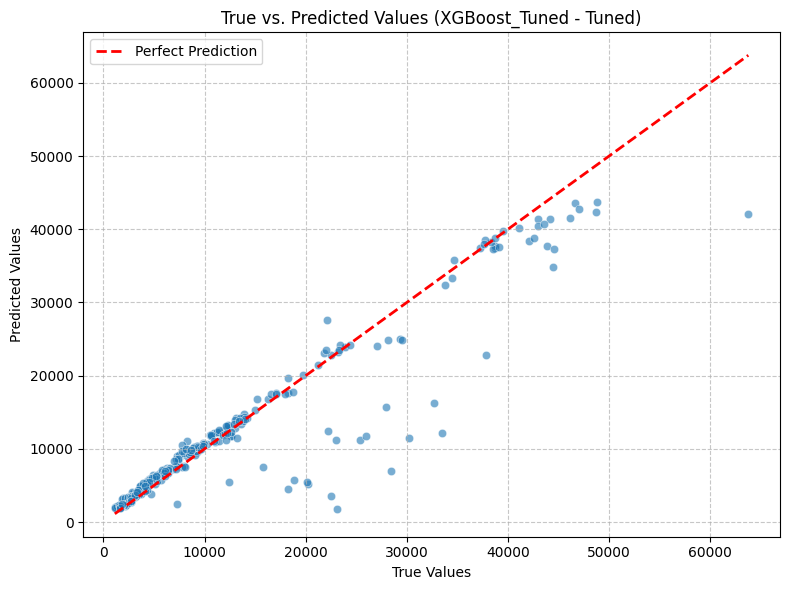

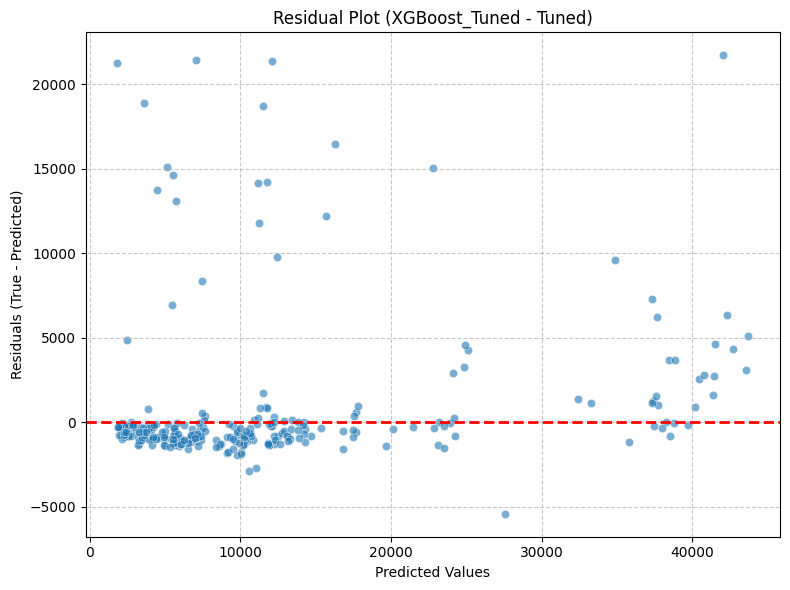


--- Advanced Tuning for RandomForest_Tuned ---
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for RandomForest_Tuned: {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 400}
Best cross-validation R2 score for RandomForest_Tuned: 0.8170

--- Test Evaluation for RandomForest_Tuned (Advanced Tuning) ---

Mean Absolute Error (MAE): 2020.7758
Mean Squared Error (MSE): 18901689.0215
R-squared (R2) Score: 0.8782
Better-tuned RandomForest_Tuned model saved to /content/drive/MyDrive/elevate_proj/task_3/models_v3/randomforest_tuned_better_model.joblib


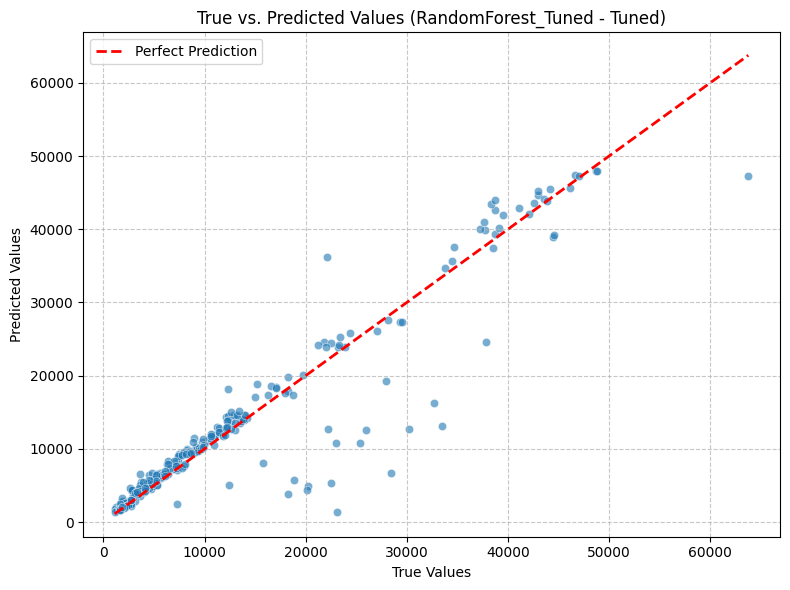

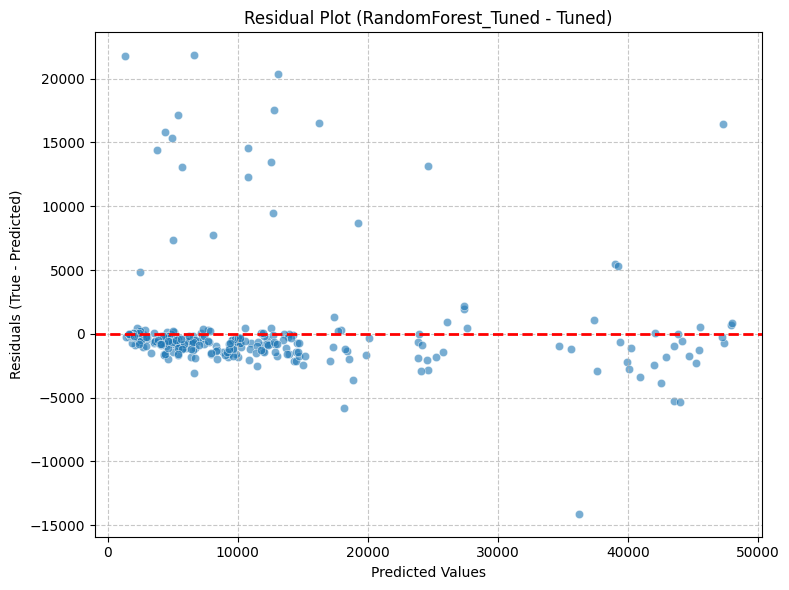

Advanced tuning results saved to /content/drive/MyDrive/elevate_proj/task_3/results_v3/advanced_tuning_results.json

--- Advanced Hyperparameter Tuning Complete ---


In [18]:
"""
# Medical Cost Prediction: End-to-End Analysis (Google Colab)
## Part 6: Advanced Hyperparameter Tuning for Top Models

This section focuses on more in-depth hyperparameter tuning for the best-performing models (XGBoost and Random Forest)
to try and achieve even better evaluation metrics. We will explore a wider range of parameters for these models.

**Action Point**: After running this section, check the `results` folder for new plots and a new JSON file
(`advanced_tuning_results.json`) that will contain the results of this deeper tuning. Compare these to the
results from Part 4 to see if performance has improved.
"""

# Ensure X_train, X_test, y_train, y_test are available from Part 3.
if 'X_train' not in locals() or X_train.empty:
    print("Training data not prepared. Please run Part 1, 2, and 3 first.")
else:
    print("\n--- Starting Advanced Hyperparameter Tuning ---")

    # Define more extensive hyperparameter grids for XGBoost and Random Forest.
    # These grids are designed to explore a broader range of values.
    advanced_tuning_models = {
        'XGBoost_Tuned': {
            'model': XGBRegressor(random_state=42, eval_metric='rmse', use_label_encoder=False),
            'params': {
                'n_estimators': [200, 300, 400], # Increased range for number of boosting rounds
                'learning_rate': [0.01, 0.05, 0.1], # Finer grain for learning rate
                'max_depth': [3, 5, 7], # Deeper trees
                'subsample': [0.7, 0.8, 0.9], # Fraction of samples to be used for fitting the individual base learners
                'colsample_bytree': [0.7, 0.8, 0.9] # Fraction of features to be used for fitting the individual base learners
            }
        },
        'RandomForest_Tuned': {
            'model': RandomForestRegressor(random_state=42),
            'params': {
                'n_estimators': [200, 300, 400], # Increased range for number of trees
                'max_depth': [15, 25, None], # Deeper trees or no limit
                'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
                'min_samples_leaf': [1, 2, 4] # Minimum number of samples required to be at a leaf node
            }
        }
    }

    advanced_tuning_results = {} # Dictionary to store results of advanced tuning

    for name, config in advanced_tuning_models.items():
        print(f"\n--- Advanced Tuning for {name} ---")
        model = config['model']
        params = config['params']

        # Use GridSearchCV with the expanded parameter grids.
        grid_search = GridSearchCV(model, params, cv=KFold(n_splits=5, shuffle=True, random_state=42),
                                   scoring='r2', n_jobs=-1, verbose=2) # Verbose=2 for more detail during tuning
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_

        print(f"Best parameters for {name}: {grid_search.best_params_}")
        print(f"Best cross-validation R2 score for {name}: {grid_search.best_score_:.4f}")

        # Evaluate on test set
        y_pred_log = best_model.predict(X_test)
        # CHANGE v3: Inverse transform predictions back to original scale before calculating metrics
        y_pred = np.expm1(y_pred_log)

        # Calculate evaluation metrics.
        # CHANGE v3: Use original y_test for metrics, not log-transformed, as y_pred is now inverse transformed
        mae = mean_absolute_error(np.expm1(y_test), y_pred)
        mse = mean_squared_error(np.expm1(y_test), y_pred)
        r2 = r2_score(np.expm1(y_test), y_pred)

        print(f"\n--- Test Evaluation for {name} (Advanced Tuning) ---\n")
        print(f"Mean Absolute Error (MAE): {mae:.4f}")
        print(f"Mean Squared Error (MSE): {mse:.4f}")
        print(f"R-squared (R2) Score: {r2:.4f}")

        metrics = {'MAE': mae, 'MSE': mse, 'R2': r2}

        # Store results of this advanced tuning.
        advanced_tuning_results[name] = {
            'best_params': grid_search.best_params_,
            'cv_r2_score': grid_search.best_score_,
            'test_metrics': metrics
        }

        # Save the better-tuned model with a distinct name.
        model_filename = os.path.join(MODELS_DIR, f'{name.lower()}_better_model.joblib')
        joblib.dump(best_model, model_filename)
        print(f"Better-tuned {name} model saved to {model_filename}")

        # Plot predictions vs. true and residuals for the better-tuned model.
        plt.figure(figsize=(8, 6))
        # CHANGE v3: Use inverse transformed y_pred and y_test for plotting
        sns.scatterplot(x=np.expm1(y_test), y=y_pred, alpha=0.6)
        plt.plot([np.expm1(y_test).min(), np.expm1(y_test).max()], [np.expm1(y_test).min(), np.expm1(y_test).max()], 'r--', lw=2, label='Perfect Prediction')
        plt.title(f'True vs. Predicted Values ({name} - Tuned)')
        plt.xlabel('True Values')
        plt.ylabel('Predicted Values')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.savefig(os.path.join(RESULTS_DIR, f'{name.lower()}_tuned_predictions_vs_true.png'))
        plt.show()
        plt.close()

        residuals = np.expm1(y_test) - y_pred
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
        plt.axhline(y=0, color='r', linestyle='--', lw=2)
        plt.title(f'Residual Plot ({name} - Tuned)')
        plt.xlabel('Predicted Values')
        plt.ylabel('Residuals (True - Predicted)')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.savefig(os.path.join(RESULTS_DIR, f'{name.lower()}_tuned_residuals.png'))
        plt.show()
        plt.close()

    # Save all advanced tuning results to a new JSON file.
    with open(os.path.join(RESULTS_DIR, 'advanced_tuning_results.json'), 'w') as f:
        json.dump(advanced_tuning_results, f, indent=4)
    print(f"Advanced tuning results saved to {RESULTS_DIR}/advanced_tuning_results.json")

    # Optionally, you can combine these results with the previous ones for a grand comparison.
    # For simplicity, we'll keep them separate for now but you could merge all_model_results and advanced_tuning_results.

    print("\n--- Advanced Hyperparameter Tuning Complete ---")


## Part 7: Model Interpretability (SHAP)

This section introduces SHAP (SHapley Additive exPlanations) to interpret the predictions of our
best-performing model. SHAP helps us understand how each feature contributes to the model's output.

**Action Point**: After running this section, check the `results_v3` folder for new SHAP plots:
- `randomforest_tuned_shap_summary.png`: Shows overall feature importance and impact.
- `randomforest_tuned_[most_important_feature]_shap_dependence.png`: Illustrates the effect of the most important feature.



--- Starting Model Interpretability with SHAP ---
Loaded RandomForest_Tuned model for SHAP explanation.
Generating SHAP summary plot for RandomForest_Tuned...


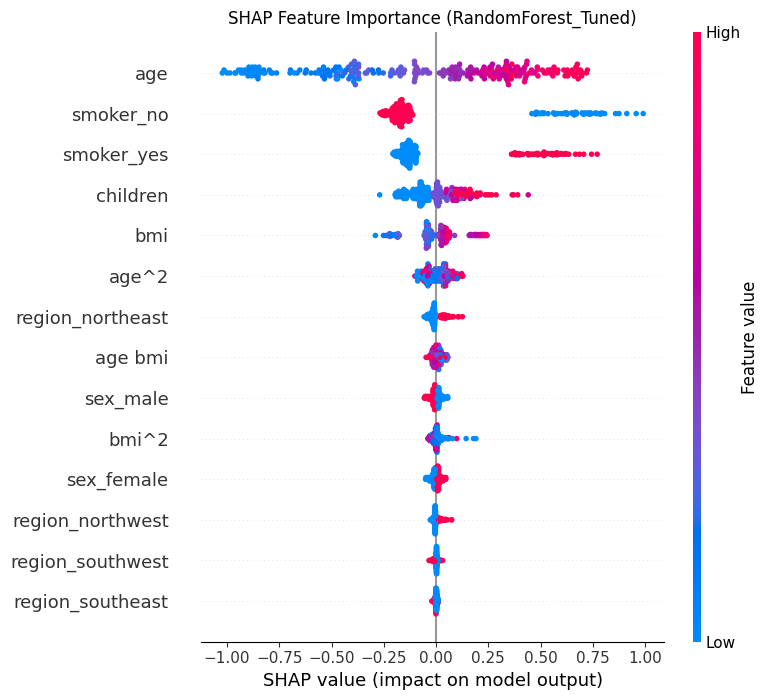

Saved SHAP summary plot to /content/drive/MyDrive/elevate_proj/task_3/results_v3/randomforest_tuned_shap_summary.png
Generating SHAP dependence plot for RandomForest_Tuned (top feature)...


<Figure size 800x600 with 0 Axes>

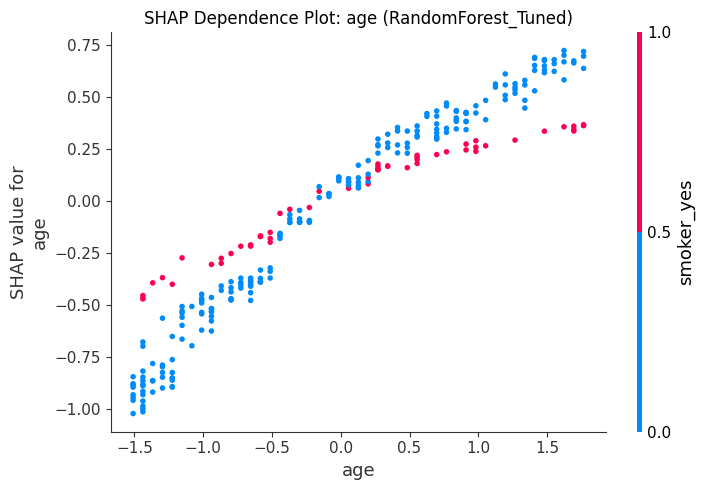

Saved SHAP dependence plot for age to /content/drive/MyDrive/elevate_proj/task_3/results_v3/randomforest_tuned_age_shap_dependence.png
--- Model Interpretability with SHAP Complete ---


In [20]:


import shap

# Ensure X_test, MODELS_DIR, RESULTS_DIR are available from previous parts.
# Also ensure that RandomForest_Tuned model is saved in MODELS_DIR.
if 'X_test' not in locals() or X_test.empty:
    print("Test data not prepared. Please run Part 1, 2, 3, and 6 first.")
else:
    print("\n--- Starting Model Interpretability with SHAP ---")

    try:
        # Load the best-performing model (RandomForest_Tuned)
        # Based on previous analysis, RandomForest_Tuned had the best MAE after log transform.
        best_model_name = 'RandomForest_Tuned'
        model_filepath = os.path.join(MODELS_DIR, f'{best_model_name.lower()}_better_model.joblib')

        # Ensure the model file exists before attempting to load
        if not os.path.exists(model_filepath):
            print(f"Error: Model file not found at {model_filepath}. Please ensure Part 6 was run successfully.")
        else:
            best_model = joblib.load(model_filepath)
            print(f"Loaded {best_model_name} model for SHAP explanation.")

            # Ensure X_test is a Pandas DataFrame for SHAP, as it needs column names.
            # X_engineered_df.columns contains the correct feature names.
            if not isinstance(X_test, pd.DataFrame):
                # If X_test is a NumPy array, convert it back to DataFrame with original engineered column names.
                # This is crucial for SHAP plots to display meaningful feature names.
                # We need the columns from X_engineered_df which was created in Part 3.
                # Assuming X_engineered_df.columns is accessible or can be reconstructed.
                # For simplicity, we'll assume X_engineered_df.columns is available from Part 3.
                # If running this cell independently, you might need to re-create X_engineered_df or load its columns.
                try:
                    # This assumes X_engineered_df was defined in a previous cell and its columns are accessible.
                    # If not, you'd need to load preprocessor and poly_transformer and apply them to a dummy X.
                    X_test_for_shap = pd.DataFrame(X_test, columns=X_engineered_df.columns)
                except NameError:
                    print("Warning: X_engineered_df.columns not found. SHAP plots might have generic feature names.")
                    X_test_for_shap = pd.DataFrame(X_test) # Proceed with generic names if columns not found
            else:
                X_test_for_shap = X_test

            # Initialize the SHAP Explainer.
            # shap.TreeExplainer is optimized for tree-based models like Random Forest and XGBoost.
            explainer = shap.TreeExplainer(best_model)

            # Calculate SHAP values for the test dataset.
            # This computes the contribution of each feature to the prediction for every instance.
            shap_values = explainer.shap_values(X_test_for_shap)

            # --- SHAP Summary Plot (Global Feature Importance) ---
            # This plot shows the overall impact of each feature on the model's predictions.
            # Features are ranked by importance, and the color indicates feature value (red=high, blue=low).
            print(f"Generating SHAP summary plot for {best_model_name}...")
            plt.figure(figsize=(10, 7))
            shap.summary_plot(shap_values, X_test_for_shap, show=False)
            plt.title(f'SHAP Feature Importance ({best_model_name})')
            plt.tight_layout()
            shap_summary_path = os.path.join(RESULTS_DIR, f'{best_model_name.lower().replace(" ", "_")}_shap_summary.png')
            plt.savefig(shap_summary_path)
            plt.show() # Display in Colab
            plt.close()
            print(f"Saved SHAP summary plot to {shap_summary_path}")

            # --- SHAP Dependence Plot (Feature Effect and Interactions) ---
            # This plot shows how a single feature (e.g., 'smoker') affects the prediction.
            # It can also highlight interactions with another feature.
            print(f"Generating SHAP dependence plot for {best_model_name} (top feature)...")

            # Find the most important feature to plot its dependence.
            # For tree models, shap_values is typically a 2D array (samples, features).
            avg_abs_shap_values = np.abs(shap_values).mean(0)

            # Ensure avg_abs_shap_values has the same length as X_test_for_shap.columns
            if len(avg_abs_shap_values) == len(X_test_for_shap.columns):
                most_important_feature_idx = np.argmax(avg_abs_shap_values)
                most_important_feature_name = X_test_for_shap.columns[most_important_feature_idx]

                plt.figure(figsize=(8, 6))
                # Plot the dependence of the most important feature, colored by another feature (e.g., 'smoker')
                # This helps visualize interactions. If 'smoker' is not in columns, choose another.
                # We'll try to pick 'smoker' if it exists, otherwise default to the second most important.
                interaction_feature = None
                if 'smoker_yes' in X_test_for_shap.columns:
                    interaction_feature = 'smoker_yes'
                elif len(avg_abs_shap_values) > 1: # Pick second most important if smoker_yes not available
                    second_most_important_feature_idx = np.argsort(avg_abs_shap_values)[-2]
                    interaction_feature = X_test_for_shap.columns[second_most_important_feature_idx]

                shap.dependence_plot(
                    most_important_feature_name, shap_values, X_test_for_shap,
                    interaction_index=interaction_feature, # Use interaction_feature for coloring
                    show=False
                )
                plt.title(f'SHAP Dependence Plot: {most_important_feature_name} ({best_model_name})')
                plt.tight_layout()
                shap_dependence_path = os.path.join(RESULTS_DIR, f'{best_model_name.lower().replace(" ", "_")}_{most_important_feature_name.replace(" ", "_")}_shap_dependence.png')
                plt.savefig(shap_dependence_path)
                plt.show() # Display in Colab
                plt.close()
                print(f"Saved SHAP dependence plot for {most_important_feature_name} to {shap_dependence_path}")
            else:
                print("Skipping SHAP dependence plot due to feature name mismatch or insufficient features.")

    except Exception as e:
        print(f"An error occurred during SHAP explanation generation: {e}")
        print("Please ensure SHAP library is installed and the model/data are correctly loaded.")
    print("--- Model Interpretability with SHAP Complete ---")
